In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
def Generate():
    x = np.random.uniform(-5, 5)
    # y = (x**2 + 2*x + 5)
    # y = (x**2 + 2*x + 5 + np.random.normal(0,1))
    print(np.random.normal(0,1))
    print(np.random.normal(1,0.5))
    y = (x**2 + 2*x + 5 + np.random.normal(0,1))*(np.random.normal(1,0.5))
    return x,y

In [7]:
Generate()

(2.7086433541203405, 23.786302590456955)

In [7]:
A = np.array([Generate() for i in range(10000)])

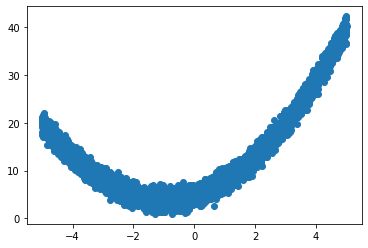

In [8]:
# plot
p = plt.scatter(A[:,0], A[:,1])

In [9]:
X = np.array((np.ones(A.shape[0]), A[:,0], A[:,0]*A[:,0])).transpose()
Y = np.array((A[:,1]))

X.shape, Y.shape

((10000, 3), (10000,))

In [10]:
model = keras.Sequential(
    [
        layers.Dense(1, name="layer1"),
        # layers.Dense(3, name="layer2"),
        # layers.Dense(1, name="layer3"),
    ]
)

model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.mean_squared_error,
    # List of metrics to monitor
    metrics=[keras.metrics.mean_squared_error, keras.metrics.mean_absolute_error],
)

In [17]:
model.fit(X, Y, epochs=3)

Epoch 1/3
313/313 [==============================] - 1s 2ms/step - loss: 1.3182 - mean_squared_error: 1.3182 - mean_absolute_error: 0.9210
Epoch 2/3
313/313 [==============================] - 1s 2ms/step - loss: 1.0927 - mean_squared_error: 1.0927 - mean_absolute_error: 0.8374
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 1.0421 - mean_squared_error: 1.0421 - mean_absolute_error: 0.8173


In [18]:
B = np.array([Generate() for i in range(1000)])

model.evaluate(np.array((np.ones(B.shape[0]), B[:,0], B[:,0]*B[:,0])).transpose(), B[:,1])

32/32 [==============================] - 0s 2ms/step - loss: 1.0288 - mean_squared_error: 1.0288 - mean_absolute_error: 0.8139


[1.0287631750106812, 1.0287631750106812, 0.8139467239379883]